In [8]:
import os
from google.colab import drive
# Authenticate for google drive integration
drive.mount('/gdrive/',force_remount=True)

Mounted at /gdrive/


In [9]:
import os
os.chdir("/gdrive/My Drive/EDAMI_PROJECT_GR_7")

In [3]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311712 sha256=b17b3266e9cc8e60cd3b529bf87725abf1eecbe57f442ba31a7b7937a19c9b3a
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [10]:
from custom_dbscan import DBSCAN
import hdbscan
import sklearn.cluster 
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
def benchmark(dataset_sizes,dataset_dimension,cluster_function, kwargs ):

  time_takens = []

  for size in dataset_sizes:

    data, _ = sklearn.datasets.make_blobs(n_samples=size, 
                                                        n_features=dataset_dimension, 
                                                        centers=5)
    start_time = time.time()
    cluster_function(data, **kwargs)
    time_taken = time.time() - start_time
    time_takens.append(round(time_taken,6))

  return time_takens

In [19]:
dataset_sizes = np.array([500,1000,5000,10000,50000,100000])

In [6]:
dataset_sizes = np.array([500,1000,5000,10000])

## DBSCAN custom


In [ ]:
#pre calculated results

In [15]:
times_db = np.array([3.44793, 13.022569, 334.861367, 1347.713979, 16322.0418,99999])  

In [ ]:
times_db = np.array([2.935787, 11.481445, 283.286809, 1133.056385, 13796.2590, 99999]) #gpu

In [ ]:
kwargs ={"Eps":1.31, "MinPt":5}
custom_dbscan = DBSCAN()
times_db = benchmark(dataset_sizes,2,custom_dbscan.fit,kwargs)
times_db

## DBSCAN sklearn

In [ ]:
#pre calculated results

In [16]:
times_db_sklearn =np.array([0.007735, 0.017118, 0.134665, 0.38697, 6.087746, 27.518308])


In [ ]:
times_db_sklearn= np.array([0.008585, 0.00988, 0.113911, 0.370377, 5.411962, 19.402351] ) #gpu

In [11]:
dbscan_sk = sklearn.cluster.DBSCAN(eps=1.31, min_samples=5)
times_db_sklearn = benchmark(dataset_sizes,2,dbscan_sk.fit,{})
times_db_sklearn

[0.008585, 0.00988, 0.113911, 0.370377, 5.411962, 19.402351]

## HDBSCAN

In [ ]:
#pre calculated results

In [17]:
times_hdb = np.array([0.036746, 0.021435, 0.12711, 0.258277, 4.943284, 4.166212])


In [ ]:
times_hdb = np.array([0.021884, 0.017642, 0.101064, 0.223361, 4.075087, 3.76294]) #gpu

In [12]:
hdbscan_ = hdbscan.HDBSCAN()
times_hdb = benchmark(dataset_sizes,2,hdbscan_.fit,{})
times_hdb

[0.021884, 0.017642, 0.101064, 0.223361, 4.075087, 3.76294]

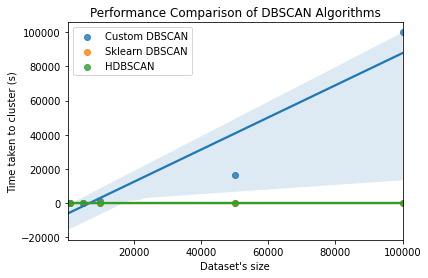

In [23]:
sns.regplot(x=dataset_sizes, y= times_db, label = 'Custom DBSCAN')
sns.regplot(x=dataset_sizes,y=times_db_sklearn,label ='Sklearn DBSCAN')
sns.regplot(x=dataset_sizes, y= times_hdb, label ='HDBSCAN')
plt.gca().set_xlabel("Dataset's size")
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of DBSCAN Algorithms')
plt.legend()

# Device Specs for Colab

In [21]:
import platform
platform.platform()

'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic'

In [13]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [14]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   30G  57% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G   40K  5.8G   1% /dev/shm
tmpfs           6.4G   44K  6.4G   1% /var/colab
/dev/sda1        76G   42G   35G  55% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   13G  2.6G  84% /gdrive


In [15]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [17]:
!cat /proc/meminfo

MemTotal:       13305368 kB
MemFree:          212700 kB
MemAvailable:   11786492 kB
Buffers:           63648 kB
Cached:          1384292 kB
SwapCached:            0 kB
Active:          2182964 kB
Inactive:       10509720 kB
Active(anon):     925344 kB
Inactive(anon):    10708 kB
Active(file):    1257620 kB
Inactive(file): 10499012 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               496 kB
Writeback:             0 kB
AnonPages:      11244776 kB
Mapped:           595236 kB
Shmem:             11460 kB
KReclaimable:     117268 kB
Slab:             173968 kB
SReclaimable:     117268 kB
SUnreclaim:        56700 kB
KernelStack:        5872 kB
PageTables:        39884 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6652684 kB
Committed_AS:   19689884 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52176 kB
VmallocChunk:          0 kB
Percpu:          

In [18]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2e42d934-c42b-5df1-b380-a33d573462e2)


In [19]:
!nvidia-smi

Wed Jun 16 11:45:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------